In [585]:
import pandas as pd
from pythainlp.tokenize import word_tokenize
#!pip install wordcloud
#pip install pandas pythainlp wordcloud matplotlib
#pip install pythainlp
#!pip install pythai

**import data**

In [586]:
df_review = pd.read_csv('df_review_clean.csv')
df_review

,id_review_main,review_rating,review_text,sentiment
0,review_1,3,เด็กเสิร์ฟน้อยขนาดไปวันเสาร์นั่งกินอาหารตั้งแต...,neg
1,review_1,5,มาครั้งแรกอาหารอร่อยถูกปาก.บรรยากาศดี.กาแฟอร่อ...,pos
2,review_1,4,บรรยากาศดีค่ะ ถ้ามาช่วงค่ำมีดนตรี อาหาร น่าจ...,pos
3,review_1,5,ร้านสวยยยยมากกก บรรยากาศดี ตอนแรกไม่ได้ตั้งใจแ...,pos
4,review_1,4,Theme Cafe & Bistro คาเฟ่โรงนาสีแดงสไตล์ยุโรปต...,pos
...,...,...,...,...
2742,review_167,4,บรรยากาศธรรมดาพิซซ่าอร่อยอย่างอื่นก็รสชาติใช้ไ...,neu
2743,review_167,5,อาหารอร่อย ราคากลางๆไม่แพงมาก ชอบพิซซ่าเตาถ่าน...,pos
2744,review_168,5,เป็นร้านกาแฟที่ใช่กาแฟที่ปลูกเอง คั่วเอง ที่จ...,neu
2745,review_169,3,positive,pos


**Group only Positive comment**

In [587]:
df_review.groupby('sentiment').size()


sentiment
neg     142
neu     318
pos    2287
dtype: int64

In [588]:
df_positive = df_review[df_review['sentiment'] == 'pos'].reset_index(drop=True)
df_positive


,id_review_main,review_rating,review_text,sentiment
0,review_1,5,มาครั้งแรกอาหารอร่อยถูกปาก.บรรยากาศดี.กาแฟอร่อ...,pos
1,review_1,4,บรรยากาศดีค่ะ ถ้ามาช่วงค่ำมีดนตรี อาหาร น่าจ...,pos
2,review_1,5,ร้านสวยยยยมากกก บรรยากาศดี ตอนแรกไม่ได้ตั้งใจแ...,pos
3,review_1,4,Theme Cafe & Bistro คาเฟ่โรงนาสีแดงสไตล์ยุโรปต...,pos
4,review_1,4,So good\r\nเครื่องดื่มดี\r\nอาหารอร่อย\r\nบริก...,pos
...,...,...,...,...
2282,review_167,4,พิซซ่าอร่อย อาหารอร่อยแต่ปริมาณน้อยไปนิด เด็กเ...,pos
2283,review_167,5,เป็นร้านเล็กๆเลียบคลอง 3ทุกอย่างดีหมดครับร้านเ...,pos
2284,review_167,5,อาหารอร่อย ราคากลางๆไม่แพงมาก ชอบพิซซ่าเตาถ่าน...,pos
2285,review_169,3,positive,pos


**tokenization**

In [589]:
#tokenization
df_positive['tokens']  = df_positive['review_text'].apply(lambda x: word_tokenize(x, engine="newmm"))
df_positive

,id_review_main,review_rating,review_text,sentiment,tokens
0,review_1,5,มาครั้งแรกอาหารอร่อยถูกปาก.บรรยากาศดี.กาแฟอร่อ...,pos,"[มา, ครั้งแรก, อาหาร, อร่อย, ถูก, ปา, ก., บรรย..."
1,review_1,4,บรรยากาศดีค่ะ ถ้ามาช่วงค่ำมีดนตรี อาหาร น่าจ...,pos,"[บรรยากาศ, ดี, ค่ะ, , ถ้า, มา, ช่วง, ค่ำ, มี..."
2,review_1,5,ร้านสวยยยยมากกก บรรยากาศดี ตอนแรกไม่ได้ตั้งใจแ...,pos,"[ร้าน, สวย, ยยย, มาก, กก, , บรรยากาศ, ดี, , ..."
3,review_1,4,Theme Cafe & Bistro คาเฟ่โรงนาสีแดงสไตล์ยุโรปต...,pos,"[Theme, , Cafe, , &, , Bistro, , คาเฟ่, โร..."
4,review_1,4,So good\r\nเครื่องดื่มดี\r\nอาหารอร่อย\r\nบริก...,pos,"[So, , good, \r\n, เครื่องดื่ม, ดี, \r\n, อาห..."
...,...,...,...,...,...
2282,review_167,4,พิซซ่าอร่อย อาหารอร่อยแต่ปริมาณน้อยไปนิด เด็กเ...,pos,"[พิซซ่า, อร่อย, , อาหาร, อร่อย, แต่, ปริมาณ, ..."
2283,review_167,5,เป็นร้านเล็กๆเลียบคลอง 3ทุกอย่างดีหมดครับร้านเ...,pos,"[เป็น, ร้าน, เล็ก, ๆ, เลียบ, คลอง, , 3, ทุกอย..."
2284,review_167,5,อาหารอร่อย ราคากลางๆไม่แพงมาก ชอบพิซซ่าเตาถ่าน...,pos,"[อาหาร, อร่อย, , ราคา, กลางๆ, ไม่, แพง, มาก, ..."
2285,review_169,3,positive,pos,[positive]


**remove stopwords**

In [590]:
# คำที่ต้องการลบ
stopwords_to_remove = {'positive', 'ร้าน', 'กก','ตัว'}

# ตรวจสอบและลบ stopwords จากเฉพาะแถวที่ tokens เป็น list
def safe_remove_stopwords(tokens):
    if isinstance(tokens, list):
        return [
            word.strip() for word in tokens
            if isinstance(word, str)
            and word.strip().lower() not in stopwords_to_remove
            and word.strip().lower() not in stopwords
            and len(word.strip()) > 1
        ]
    return []  # ถ้าไม่ใช่ list ให้คืนค่าลิสต์ว่าง

# ใช้กับคอลัมน์ 'tokens'
df_positive = df_positive.assign(
    clean_tokens = df_positive['tokens'].apply(safe_remove_stopwords)
).loc[
    lambda df: ~df['clean_tokens'].apply(lambda x: any(word in stopwords_to_remove for word in x) if isinstance(x, list) else False)
]
df_positive 

,id_review_main,review_rating,review_text,sentiment,tokens,clean_tokens
0,review_1,5,มาครั้งแรกอาหารอร่อยถูกปาก.บรรยากาศดี.กาแฟอร่อ...,pos,"[มา, ครั้งแรก, อาหาร, อร่อย, ถูก, ปา, ก., บรรย...","[ครั้งแรก, อาหาร, อร่อย, ปา, ก., บรรยากาศ, ดี,..."
1,review_1,4,บรรยากาศดีค่ะ ถ้ามาช่วงค่ำมีดนตรี อาหาร น่าจ...,pos,"[บรรยากาศ, ดี, ค่ะ, , ถ้า, มา, ช่วง, ค่ำ, มี...","[บรรยากาศ, ดี, ค่ำ, ดนตรี, อาหาร, สวย, ค่า, อา..."
2,review_1,5,ร้านสวยยยยมากกก บรรยากาศดี ตอนแรกไม่ได้ตั้งใจแ...,pos,"[ร้าน, สวย, ยยย, มาก, กก, , บรรยากาศ, ดี, , ...","[สวย, ยยย, บรรยากาศ, ดี, ตอนแรก, ตั้งใจ, แวะ, ..."
3,review_1,4,Theme Cafe & Bistro คาเฟ่โรงนาสีแดงสไตล์ยุโรปต...,pos,"[Theme, , Cafe, , &, , Bistro, , คาเฟ่, โร...","[Theme, Cafe, Bistro, คาเฟ่, โรงนา, สีแดง, สไต..."
4,review_1,4,So good\r\nเครื่องดื่มดี\r\nอาหารอร่อย\r\nบริก...,pos,"[So, , good, \r\n, เครื่องดื่ม, ดี, \r\n, อาห...","[So, good, เครื่องดื่ม, ดี, อาหาร, อร่อย, บริก..."
...,...,...,...,...,...,...
2282,review_167,4,พิซซ่าอร่อย อาหารอร่อยแต่ปริมาณน้อยไปนิด เด็กเ...,pos,"[พิซซ่า, อร่อย, , อาหาร, อร่อย, แต่, ปริมาณ, ...","[พิซซ่า, อร่อย, อาหาร, อร่อย, ปริมาณ, เด็กเสิร..."
2283,review_167,5,เป็นร้านเล็กๆเลียบคลอง 3ทุกอย่างดีหมดครับร้านเ...,pos,"[เป็น, ร้าน, เล็ก, ๆ, เลียบ, คลอง, , 3, ทุกอย...","[เลียบ, คลอง, ดี, น่ารัก, บรรยากาศ, ดีมาก, เหม..."
2284,review_167,5,อาหารอร่อย ราคากลางๆไม่แพงมาก ชอบพิซซ่าเตาถ่าน...,pos,"[อาหาร, อร่อย, , ราคา, กลางๆ, ไม่, แพง, มาก, ...","[อาหาร, อร่อย, ราคา, กลางๆ, แพง, ชอบ, พิซซ่า, ..."
2285,review_169,3,positive,pos,[positive],[]


**normalize token**

In [591]:
import re

# ฟังก์ชันสำหรับ normalize token อย่างปลอดภัย
def normalize_tokens(tokens):
    if isinstance(tokens, list):
        clean_list = []
        for token in tokens:
            if isinstance(token, str):
                token = token.lower()
                token = re.sub(r'[^\u0E00-\u0E7Fa-zA-Z]+', '', token)  # ลบสัญลักษณ์และตัวเลข
                if len(token) > 1 and token not in ['ๆ', 'ฯ', 'ฯลฯ']:
                    clean_list.append(token)
        return clean_list
    return []

df_positive['normalized_tokens'] = df_positive['clean_tokens'].apply(normalize_tokens)


**frequency of word**

In [592]:
#df wordcount all
from collections import Counter
import pandas as pd

# รวมคำทั้งหมดจากทุกแถวใน clean_tokens
all_words = [word for row in df_positive['clean_tokens'] if isinstance(row, list) for word in row]

# นับความถี่
word_counts = Counter(all_words)

# สร้าง DataFrame
df_words = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# เรียงจากมากไปน้อย
df_words = df_words.sort_values(by='count', ascending=False).reset_index(drop=True)

from IPython.display import HTML

# ตั้งค่าความสูงที่คุณต้องการ
scrollable_df = df_words.to_html(index=False)
html_code = f'<div style="height: 300px; overflow-y: scroll;">{scrollable_df}</div>'

# แสดงผล
display(HTML(html_code))


word,count
อร่อย,1155
ดี,1153
กาแฟ,723
บรรยากาศ,595
อาหาร,511
ราคา,447
น่ารัก,414
นั่ง,368
เครื่องดื่ม,317
รสชาติ,310


**word cloud**

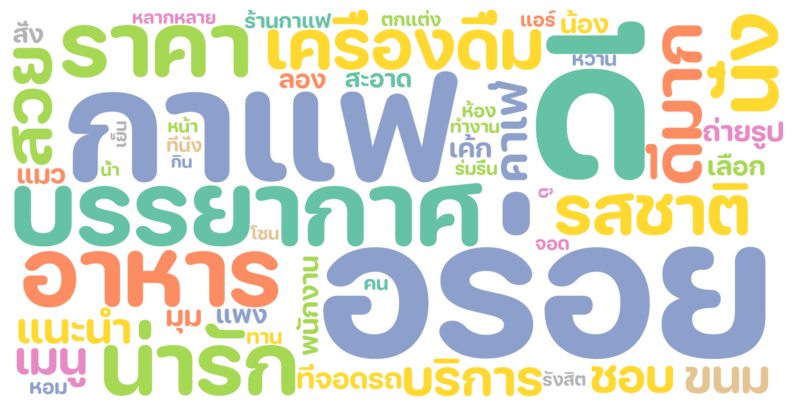

In [598]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = [word for tokens in df_positive['normalized_tokens'] for word in tokens]
word_freq = Counter(all_words)

wordcloud = WordCloud(
    font_path= r'fonts/fc_iconic.otf' , 
    width=2000,
    height=1000,
    background_color='white',
    colormap='Set2',
    max_words=50
).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**เพิ่มเติม**

In [594]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# # สร้าง dictionary จาก df_words
# word_freq = dict(zip(df_words['word'], df_words['count']))

# # สร้าง WordCloud จากความถี่ของคำ
# wordcloud = WordCloud(
#     font_path= r'c:\USERS\PPICH\APPDATA\LOCAL\MICROSOFT\WINDOWS\FONTS\CARTOONBOLD.TTF',  
#     width=2000,
#     height=1000,
#     background_color='white',
#     colormap='tab20c',
#     prefer_horizontal=1,
#     max_words=50
# ).generate_from_frequencies(word_freq)

# # แสดงผล
# plt.figure(figsize=(10, 9))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.show()



In [595]:
# df_positive

In [596]:
# all_words = [
#     word for tokens in df_positive['normalized_tokens']
#     if isinstance(tokens, list)
#     for word in tokens
# ]

# text = ' '.join(all_words)

# wordcloud = WordCloud(
#     font_path = r'c:\USERS\PPICH\APPDATA\LOCAL\MICROSOFT\WINDOWS\FONTS\CARTOONBOLD.TTF',
#     stopwords=None,
#     width=2000,
#     height=1000,
#     prefer_horizontal=1,
#     max_words=50,
#     colormap='tab20c',
#     background_color='white'
# ).generate(text)

# plt.figure(figsize=(10, 9))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.show()
